In [127]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data
import pandas_datareader as web
import eventstudy as es
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.stats import norm
from numpy import sqrt, abs
from datetime import date, datetime, timedelta
import numpy as np
from statistics import NormalDist

In [128]:
ftse = pd.DataFrame(pd.read_csv('ftse.csv'))
ftse.index = ftse['Date']
ftse = pd.DataFrame(ftse['Close Price'])
ftse.columns = ['^FTLC']
ftse.index.name = None
ftse.index = pd.to_datetime(ftse.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
ftse['^FTLC'].values
ftse = ftse.pct_change()[1:]
ftse


,^FTLC
2015-01-05,-0.018069
2015-01-06,-0.008069
2015-01-07,0.007774
2015-01-08,0.022002
2015-01-09,-0.009544
...,...
2016-10-26,-0.008317
2016-10-27,0.002596
2016-10-28,0.001754
2016-10-31,-0.005960


In [129]:
tickers2 = pd.read_csv("tickers2.csv")
tickers2 = tickers2.drop(["Unnamed: 4", "Unnamed: 5","Unnamed: 0"], axis=1)
tickers2 = pd.DataFrame(tickers2)
sectors = list(tickers2['Sector'].unique())
del sectors[-1]

sectors


['Basic Materials',
 'Communication Services',
 'Consumer Cyclical',
 'Consumer Defensive',
 'Energy',
 'Financial Services',
 'Healthcare',
 'Industrials',
 'Real Estate',
 'Technology',
 'Utilities']

In [130]:
start_date = "01-01-2015"
end_date = "05-11-2016"
tic = list(tickers2[tickers2['Sector']==sectors[1]]['Ticker'])
tic.extend(['^IXIC','^TNX'])
tic.index()

['FDEV.L',
 'GAMA.L',
 'NAH.L',
 'NFC.L',
 'SAA.L',
 'ULS.L',
 'AAF.L',
 'BMY.L',
 'CINE.L',
 'FOUR.L',
 'FUTR.L',
 'INF.L',
 'ITV.L',
 'MONY.L',
 'PSON.L',
 'RCH.L',
 'REL.L',
 'RMV.L',
 'STVG.L',
 'VOD.L',
 'WPP.L',
 'SNWS.L',
 'DCD.L',
 'CCPA.L',
 'CCP.L',
 'CCPC.L',
 'LBG.L',
 'CAU.L',
 'SBDS.L',
 'ZEG.L',
 'AEO.L',
 'EBQ.L',
 'DNM.L',
 'ZIN.L',
 'SYS1.L',
 'ADT.L',
 'SEEN.L',
 'EMAN.L',
 'SAL.L',
 'OTMP.L',
 'JWNG.L',
 'TMO.L',
 'ASCL.L',
 'QRT.L',
 'TOOP.L',
 'TM17.L',
 'NWOR.L',
 'CNIC.L',
 'BONH.L',
 'OMIP.L',
 'IME.L',
 'TMG.L',
 'LVCG.L',
 'GILD.L',
 'YOU.L',
 'BBB.L',
 'DBOX.L',
 'AFRN.L',
 'IMMO.L',
 'MIRI.L',
 'PEBB.L',
 'SFOR.L',
 'HTWS.L',
 'MDZ.L',
 'AUTO.L',
 'BBSN.L',
 'BT-A.L',
 '7DIG.L',
 'BIDS.L',
 'MOS.L',
 'MAI.L',
 '^IXIC',
 '^TNX']

In [131]:
# def estimation_period():

returns = web.get_data_yahoo(tic, start_date, end_date, interval = "d")["Adj Close"]
# market_returns = web.get_data_yahoo("^IXIC", start_date, end_date, interval = 'd').pct_change()[1:]['Close']
# risk_free_returns = web.get_data_yahoo('^TNX', start_date, end_date, interval = 'd').pct_change()[1:]['Close']
# returns = pd.DataFrame(returns).pct_change()[1:]
# returns = returns.drop("AAF.L", axis=1).pct_change()[1:]
returns = returns.pct_change()[1:]
rows = returns.shape[0]
returns.index = pd.to_datetime(returns.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
returns


C:\Users\vgole\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'AAF.L', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\vgole\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'LBG.L', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\vgole\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'SBDS.L', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\vgole\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'DNM.L', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\vgole\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Fail

Symbols,FDEV.L,GAMA.L,NAH.L,NFC.L,SAA.L,ULS.L,BMY.L,CINE.L,FOUR.L,FUTR.L,INF.L,ITV.L,MONY.L,PSON.L,RCH.L,REL.L,RMV.L,STVG.L,VOD.L,WPP.L,SNWS.L,DCD.L,CCPA.L,CCP.L,CCPC.L,CAU.L,ZEG.L,AEO.L,EBQ.L,ZIN.L,SYS1.L,ADT.L,EMAN.L,SAL.L,JWNG.L,ASCL.L,QRT.L,TOOP.L,CNIC.L,BONH.L,OMIP.L,IME.L,TMG.L,LVCG.L,YOU.L,BBB.L,DBOX.L,AFRN.L,MDZ.L,AUTO.L,BBSN.L,BT-A.L,7DIG.L,BIDS.L,MOS.L,MAI.L,^IXIC,^TNX,AAF.L,LBG.L,SBDS.L,DNM.L,SEEN.L,OTMP.L,TMO.L,TM17.L,NWOR.L,GILD.L,IMMO.L,MIRI.L,PEBB.L,SFOR.L,HTWS.L
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.010638,-0.002075,0.000000,0.000000,-0.030769,-0.009524,-0.032558,-0.007490,0.008663,0.000000,-0.011603,-0.018284,-0.013141,-0.013605,-0.027864,-0.010073,-0.032174,0.008219,-0.024561,-0.012668,0.014263,0.0,0.0,0.0,0.0,-0.025000,NaN,0.000000,0.000000,-0.057143,0.000000,0.024222,0.0,0.010870,0.0,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.0,-0.005917,0.000000,0.000000,-0.066666,0.000000,-0.015385,-0.028985,NaN,0.000000,-0.021446,0.000000,0.071429,0.000000,0.0,-0.015706,-0.039567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,-0.010753,0.000000,-0.015801,0.000000,-0.031746,0.000000,-0.024039,-0.014119,-0.000307,-0.018182,-0.009348,-0.010506,-0.024914,-0.013793,0.006370,-0.013876,-0.019317,-0.008152,-0.005082,-0.012830,-0.018750,0.0,0.0,0.0,0.0,0.001973,NaN,0.018519,0.051502,0.272727,-0.006502,0.060811,0.0,0.021505,0.0,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.0,-0.005952,0.000000,0.000000,0.000000,0.000000,-0.011719,0.014925,NaN,-0.016949,-0.016565,0.060606,-0.040000,-0.048544,0.0,-0.012859,-0.037273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,-0.004348,0.000000,-0.013762,0.000000,0.003279,-0.012821,-0.011494,-0.006914,-0.016876,-0.004629,0.014922,-0.001930,0.002643,-0.003497,-0.007912,0.010319,0.006871,0.014041,0.003018,0.011468,0.000000,0.0,0.0,0.0,0.0,-0.005906,NaN,0.045455,0.020408,0.190476,0.000000,-0.006369,0.0,0.000000,0.0,NaN,0.000000,NaN,0.000000,0.000000,0.021739,0.0,0.000000,-0.095238,0.000000,-0.023810,0.000000,0.000000,-0.029412,NaN,0.000000,0.019435,-0.035714,-0.069444,-0.020408,0.0,0.012570,-0.004585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,-0.082969,0.000000,0.023256,0.000000,-0.003268,0.000000,0.012458,0.019145,0.004370,0.023256,0.027027,0.013056,0.010984,0.020176,0.014355,0.014856,0.025933,-0.006079,0.045139,0.028723,-0.033033,0.0,0.0,0.0,0.0,0.005941,NaN,-0.017391,0.012000,-0.120000,0.000000,-0.028846,0.0,0.000000,0.0,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.015152,NaN,-0.051724,0.014998,0.000000,-0.044776,0.000000,0.0,0.018432,0.031730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09,0.142857,0.000000,0.018182,0.000000,0.015574,0.000000,0.000820,0.008782,-0.000621,0.000000,-0.009684,0.019093,0.003911,0.012038,0.003144,-0.002745,-0.043459,-0.013252,-0.003765,-0.002204,-0.021417,0.0,0.0,0.0,0.0,0.015748,NaN,-0.088496,0.019763,0.000000,0.000000,0.006600,0.0,0.010526,0.0,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.0,0.005988,0.000000,0.000000,0.024390,-0.071429,0.000000,0.061538,NaN,0.018182,-0.017030,0.000000,-0.015625,0.000000,0.0,-0.006782,-0.022321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-05,-0.017073,0.011186,-0.014170,-0.025554,-0.000361,0.023148,0.000000,0.003785,0.001501,-0.026667,0.010663,-0.008885,-0.012010,0.026131,0.053097,0.003309,-0.002938,-0.028895,0.006424,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.032139,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-0.016000,0.0,0.005319,0.000000,NaN,0.000000,0.730909,0.000000,0.0,0.000000,0.000000,0.031847,0.0

In [166]:
returns.iax['2016-05-11']

AttributeError: 'DataFrame' object has no attribute 'iax'

In [132]:
isn = dict(returns.isnull().mean().transpose())
for sym, val in isn.items():
    if returns.shape[0]==rows:
        if val>0:
            returns.drop([sym],axis=1,inplace=True)
    
    # print(sym, val)
returns

Symbols,FDEV.L,GAMA.L,NAH.L,NFC.L,SAA.L,ULS.L,BMY.L,CINE.L,FOUR.L,FUTR.L,INF.L,ITV.L,MONY.L,PSON.L,RCH.L,REL.L,RMV.L,STVG.L,VOD.L,WPP.L,SNWS.L,DCD.L,CCPA.L,CCP.L,CCPC.L,CAU.L,AEO.L,EBQ.L,ZIN.L,SYS1.L,ADT.L,EMAN.L,SAL.L,JWNG.L,QRT.L,CNIC.L,BONH.L,OMIP.L,IME.L,TMG.L,LVCG.L,YOU.L,BBB.L,DBOX.L,AFRN.L,MDZ.L,BBSN.L,BT-A.L,7DIG.L,BIDS.L,MOS.L,MAI.L,^IXIC,^TNX
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.010638,-0.002075,0.000000,0.000000,-0.030769,-0.009524,-0.032558,-0.007490,0.008663,0.000000,-0.011603,-0.018284,-0.013141,-0.013605,-0.027864,-0.010073,-0.032174,0.008219,-0.024561,-0.012668,0.014263,0.0,0.0,0.0,0.0,-0.025000,0.000000,0.000000,-0.057143,0.000000,0.024222,0.0,0.010870,0.0,0.000000,0.000000,0.000000,0.000000,0.0,-0.005917,0.000000,0.000000,-0.066666,0.000000,-0.015385,-0.028985,0.000000,-0.021446,0.000000,0.071429,0.000000,0.0,-0.015706,-0.039567
2015-01-06,-0.010753,0.000000,-0.015801,0.000000,-0.031746,0.000000,-0.024039,-0.014119,-0.000307,-0.018182,-0.009348,-0.010506,-0.024914,-0.013793,0.006370,-0.013876,-0.019317,-0.008152,-0.005082,-0.012830,-0.018750,0.0,0.0,0.0,0.0,0.001973,0.018519,0.051502,0.272727,-0.006502,0.060811,0.0,0.021505,0.0,0.000000,0.000000,0.000000,0.000000,0.0,-0.005952,0.000000,0.000000,0.000000,0.000000,-0.011719,0.014925,-0.016949,-0.016565,0.060606,-0.040000,-0.048544,0.0,-0.012859,-0.037273
2015-01-07,-0.004348,0.000000,-0.013762,0.000000,0.003279,-0.012821,-0.011494,-0.006914,-0.016876,-0.004629,0.014922,-0.001930,0.002643,-0.003497,-0.007912,0.010319,0.006871,0.014041,0.003018,0.011468,0.000000,0.0,0.0,0.0,0.0,-0.005906,0.045455,0.020408,0.190476,0.000000,-0.006369,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.021739,0.0,0.000000,-0.095238,0.000000,-0.023810,0.000000,0.000000,-0.029412,0.000000,0.019435,-0.035714,-0.069444,-0.020408,0.0,0.012570,-0.004585
2015-01-08,-0.082969,0.000000,0.023256,0.000000,-0.003268,0.000000,0.012458,0.019145,0.004370,0.023256,0.027027,0.013056,0.010984,0.020176,0.014355,0.014856,0.025933,-0.006079,0.045139,0.028723,-0.033033,0.0,0.0,0.0,0.0,0.005941,-0.017391,0.012000,-0.120000,0.000000,-0.028846,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.015152,-0.051724,0.014998,0.000000,-0.044776,0.000000,0.0,0.018432,0.031730
2015-01-09,0.142857,0.000000,0.018182,0.000000,0.015574,0.000000,0.000820,0.008782,-0.000621,0.000000,-0.009684,0.019093,0.003911,0.012038,0.003144,-0.002745,-0.043459,-0.013252,-0.003765,-0.002204,-0.021417,0.0,0.0,0.0,0.0,0.015748,-0.088496,0.019763,0.000000,0.000000,0.006600,0.0,0.010526,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.005988,0.000000,0.000000,0.024390,-0.071429,0.000000,0.061538,0.018182,-0.017030,0.000000,-0.015625,0.000000,0.0,-0.006782,-0.022321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-05,-0.017073,0.011186,-0.014170,-0.025554,-0.000361,0.023148,0.000000,0.003785,0.001501,-0.026667,0.010663,-0.008885,-0.012010,0.026131,0.053097,0.003309,-0.002938,-0.028895,0.006424,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.032139,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-0.016000,0.0,0.000000,0.000000,0.730909,0.000000,0.0,0.000000,0.000000,0.031847,0.029851,0.000000,0.004566,-0.058824,0.000000,0.026280,0.204082,0.000000,-0.045455,0.0,-0.001809,-0.020740
2016-05-06,0.000000,-0.011062,0.000000,0.000000,-0.033562,0.004525,-0.006579,-0.004712,-0.002249,-0.023973,-0.005275,-0.028687,-0.009917,0.018633,-0.048320,0.006595,-0.001758,-0.003881,-0.002735,0.009458,0.001592,0.0,0.0,0.0,0.0,-0.014354,0.000000,0.000000,0.000000,0.014286,0.000000,0.0,0.000000,0.0,0.000000,-0.052083,-0.212185,0.028571,0.0,0.000000,0.000000,-0.030864,-0.072463,0.000000,-0.004546,0.000000,0.000000,-0.016739,0.000000,0.352941,0.190476,0.0,0.004043,0.018317
2016-05-09,0.000000,-0.004474,-0.005134

In [133]:
returns.describe()

Symbols,FDEV.L,GAMA.L,NAH.L,NFC.L,SAA.L,ULS.L,BMY.L,CINE.L,FOUR.L,FUTR.L,INF.L,ITV.L,MONY.L,PSON.L,RCH.L,REL.L,RMV.L,STVG.L,VOD.L,WPP.L,SNWS.L,DCD.L,CCPA.L,CCP.L,CCPC.L,CAU.L,AEO.L,EBQ.L,ZIN.L,SYS1.L,ADT.L,EMAN.L,SAL.L,JWNG.L,QRT.L,CNIC.L,BONH.L,OMIP.L,IME.L,TMG.L,LVCG.L,YOU.L,BBB.L,DBOX.L,AFRN.L,MDZ.L,BBSN.L,BT-A.L,7DIG.L,BIDS.L,MOS.L,MAI.L,^IXIC,^TNX
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,-0.000314,0.001914,0.000803,0.001865,0.000246,0.001464,-0.000012,0.000791,0.001659,-0.000458,0.001157,0.000148,0.001005,-0.000852,-0.000736,0.000414,0.001764,0.000377,0.000114,0.000605,0.000233,-0.000747,0.000002,-0.000074,0.000032,-0.000406,-0.001051,0.000256,-0.003170,-0.000120,0.002059,0.000258,0.001321,0.000350,0.001502,0.000949,0.002643,-0.002272,0.002347,-0.000008,-0.001854,0.000826,0.001461,0.000534,-0.000237,-0.000317,-0.005624,0.000356,-0.001420,-0.003516,0.001573,0.000818,0.000081,-0.000288
std,0.015967,0.016224,0.032428,0.011570,0.017817,0.017585,0.014827,0.015681,0.017871,0.019888,0.012713,0.015442,0.018889,0.021189,0.021084,0.012120,0.018786,0.020687,0.014721,0.013940,0.018122,0.033196,0.000043,0.002295,0.000591,0.025222,0.034784,0.006301,0.047656,0.010779,0.021794,0.009631,0.034459,0.009861,0.015308,0.038551,0.092398,0.028436,0.053627,0.015069,0.061461,0.011654,0.033324,0.060181,0.021051,0.063377,0.033221,0.014789,0.041894,0.089990,0.093422,0.014626,0.011037,0.024106
min,-0.134199,-0.091335,-0.242376,-0.068607,-0.082696,-0.079365,-0.060345,-0.070707,-0.066829,-0.075663,-0.043125,-0.072407,-0.106777,-0.159512,-0.066072,-0.048020,-0.079858,-0.063830,-0.048013,-0.055752,-0.076401,-0.286713,0.000000,-0.023256,0.000000,-0.100000,-0.257732,-0.038194,-0.318182,-0.133916,-0.119266,-0.058824,-0.201492,-0.071429,-0.117021,-0.236515,-0.294118,-0.216216,-0.227723,-0.066667,-0.296296,-0.038298,-0.108109,-0.400000,-0.303514,-0.307692,-0.210526,-0.049346,-0.227848,-0.250000,-0.320000,-0.075472,-0.038204,-0.061147
25%,0.000000,-0.004943,-0.010421,0.000000,-0.009373,0.000000,-0.007533,-0.006992,-0.008306,-0.011494,-0.006787,-0.009198,-0.007020,-0.011023,-0.011742,-0.006967,-0.007261,-0.012389,-0.009228,-0.007747,-0.009615,0.000000,0.000000,0.000000,0.000000,-0.015006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.008081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.006006,0.000000,-0.003584,-0.028571,0.000000,-0.009171,-0.009050,-0.040417,-0.022348,0.000000,-0.004926,-0.015778
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000827,0.000000,0.000365,-0.000368,0.001418,-0.000728,0.000000,0.000000,0.000686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000209,0.000000,0.000000,0.000000,0.000000,0.000074,-0.001940
75%,0.000000,0.007584,0.011730,0.002647,0.008367,0.003730,0.007706,0.008753,0.009533,0.011800,0.008535,0.009739,0.009796,0.010357,0.008997,0.007151,0.010738,0.012741,0.009055,0.009520,0.010358,0.000000,0.000000,0.000000,0.000000,0.013202,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005723,0.000000,0.000000,0.000000,0.000000,0.009507,0.000000,0.001351,0.000000,0.000000,0.006021,0.015152


In [134]:
for i in range(len(returns.columns[:-2])):
    returns[returns.columns[i]] = returns[returns.columns[i]] - returns['^TNX'].mean()
returns.dropna()

Symbols,FDEV.L,GAMA.L,NAH.L,NFC.L,SAA.L,ULS.L,BMY.L,CINE.L,FOUR.L,FUTR.L,INF.L,ITV.L,MONY.L,PSON.L,RCH.L,REL.L,RMV.L,STVG.L,VOD.L,WPP.L,SNWS.L,DCD.L,CCPA.L,CCP.L,CCPC.L,CAU.L,AEO.L,EBQ.L,ZIN.L,SYS1.L,ADT.L,EMAN.L,SAL.L,JWNG.L,QRT.L,CNIC.L,BONH.L,OMIP.L,IME.L,TMG.L,LVCG.L,YOU.L,BBB.L,DBOX.L,AFRN.L,MDZ.L,BBSN.L,BT-A.L,7DIG.L,BIDS.L,MOS.L,MAI.L,^IXIC,^TNX
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.010350,-0.001787,0.000288,0.000288,-0.030481,-0.009236,-0.032270,-0.007202,0.008951,0.000288,-0.011315,-0.017996,-0.012853,-0.013317,-0.027576,-0.009785,-0.031886,0.008507,-0.024273,-0.012380,0.014551,0.000288,0.000288,0.000288,0.000288,-0.024712,0.000288,0.000288,-0.056855,0.000288,0.024510,0.000288,0.011158,0.000288,0.000288,0.000288,0.000288,0.000288,0.000288,-0.005629,0.000288,0.000288,-0.066378,0.000288,-0.015097,-0.028698,0.000288,-0.021159,0.000288,0.071716,0.000288,0.000288,-0.015706,-0.039567
2015-01-06,-0.010465,0.000288,-0.015513,0.000288,-0.031458,0.000288,-0.023751,-0.013831,-0.000019,-0.017894,-0.009060,-0.010218,-0.024626,-0.013505,0.006658,-0.013588,-0.019029,-0.007864,-0.004794,-0.012542,-0.018462,0.000288,0.000288,0.000288,0.000288,0.002260,0.018806,0.051790,0.273015,-0.006214,0.061099,0.000288,0.021793,0.000288,0.000288,0.000288,0.000288,0.000288,0.000288,-0.005664,0.000288,0.000288,0.000288,0.000288,-0.011431,0.015213,-0.016661,-0.016277,0.060894,-0.039712,-0.048256,0.000288,-0.012859,-0.037273
2015-01-07,-0.004060,0.000288,-0.013474,0.000288,0.003567,-0.012533,-0.011206,-0.006626,-0.016589,-0.004342,0.015210,-0.001643,0.002931,-0.003209,-0.007624,0.010607,0.007159,0.014329,0.003306,0.011756,0.000288,0.000288,0.000288,0.000288,0.000288,-0.005618,0.045742,0.020696,0.190764,0.000288,-0.006081,0.000288,0.000288,0.000288,0.000288,0.000288,0.000288,0.022027,0.000288,0.000288,-0.094950,0.000288,-0.023522,0.000288,0.000288,-0.029124,0.000288,0.019723,-0.035426,-0.069157,-0.020120,0.000288,0.012570,-0.004585
2015-01-08,-0.082682,0.000288,0.023544,0.000288,-0.002980,0.000288,0.012746,0.019433,0.004658,0.023544,0.027315,0.013344,0.011272,0.020464,0.014642,0.015144,0.026220,-0.005791,0.045427,0.029011,-0.032745,0.000288,0.000288,0.000288,0.000288,0.006229,-0.017103,0.012288,-0.119712,0.000288,-0.028558,0.000288,0.000288,0.000288,0.000288,0.000288,0.000288,0.000288,0.000288,0.000288,0.000288,0.000288,0.000288,0.000288,0.000288,-0.014864,-0.051436,0.015285,0.000288,-0.044488,0.000288,0.000288,0.018432,0.031730
2015-01-09,0.143145,0.000288,0.018470,0.000288,0.015862,0.000288,0.001108,0.009070,-0.000334,0.000288,-0.009396,0.019381,0.004199,0.012326,0.003432,-0.002457,-0.043171,-0.012964,-0.003477,-0.001916,-0.021129,0.000288,0.000288,0.000288,0.000288,0.016036,-0.088208,0.020051,0.000288,0.000288,0.006888,0.000288,0.010814,0.000288,0.000288,0.000288,0.000288,0.000288,0.000288,0.006276,0.000288,0.000288,0.024678,-0.071141,0.000288,0.061826,0.018470,-0.016742,0.000288,-0.015337,0.000288,0.000288,-0.006782,-0.022321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-05,-0.016785,0.011474,-0.013882,-0.025266,-0.000073,0.023436,0.000288,0.004072,0.001789,-0.026379,0.010951,-0.008597,-0.011722,0.026419,0.053385,0.003596,-0.002650,-0.028607,0.006712,0.000288,0.000288,0.000288,0.000288,0.000288,0.000288,-0.031851,0.000288,0.000288,0.000288,0.000288,0.000288,0.000288,-0.015712,0.000288,0.000288,0.000288,0.731197,0.000288,0.000288,0.000288,0.000288,0.032135,0.030139,0.000288,0.004854,-0.058536,0.000288,0.026568,0.204370,0.000288,-0.045167,0.000288,-0.001809,-0.020740
2016-05-06,0.000288,-0.010774,0.000288,0.000288,-0.033274,0.004813,-0.006291,-0.004425,-0.001961,-0.023685,-0.004987,-0.028399,-0.009629,0.018921,-0.048032,0.006883,-0.001470,-0.003593,-0.002447,0.009746,0.001880,0.000288,0.000288,0.000288,0.000288,-0.014066,0.000288,0.000288

In [135]:
returns = returns.dropna()
x = returns['^IXIC']
x_sm = sm.add_constant(x)
values = pd.DataFrame(index=['0','1'], columns=list(returns.columns)[:-2])

In [136]:

for i in range(len(returns.columns[:-2])):
    returns = returns.dropna()
    y = returns[returns.columns[i]]
    model = sm.OLS(y,x_sm)
    results = model.fit()
    values.iat[0,i] = results.params[0]
    values.iat[1,i] = results.params[1]
  

In [137]:
values

,FDEV.L,GAMA.L,NAH.L,NFC.L,SAA.L,ULS.L,BMY.L,CINE.L,FOUR.L,FUTR.L,INF.L,ITV.L,MONY.L,PSON.L,RCH.L,REL.L,RMV.L,STVG.L,VOD.L,WPP.L,SNWS.L,DCD.L,CCPA.L,CCP.L,CCPC.L,CAU.L,AEO.L,EBQ.L,ZIN.L,SYS1.L,ADT.L,EMAN.L,SAL.L,JWNG.L,QRT.L,CNIC.L,BONH.L,OMIP.L,IME.L,TMG.L,LVCG.L,YOU.L,BBB.L,DBOX.L,AFRN.L,MDZ.L,BBSN.L,BT-A.L,7DIG.L,BIDS.L,MOS.L,MAI.L
0,-0.000023,0.002194,0.00109,0.002142,0.000525,0.00173,0.000262,0.001048,0.001926,-0.00018,0.001404,0.000393,0.00126,-0.000609,-0.00045,0.000663,0.002012,0.000655,0.00036,0.000844,0.000502,-0.000465,0.00029,0.000213,0.00032,-0.000115,-0.000758,0.000545,-0.002848,0.000168,0.002337,0.000549,0.001603,0.00063,0.001775,0.001233,0.002902,-0.002001,0.002618,0.000267,-0.001588,0.001112,0.001724,0.000819,0.000047,-0.000069,-0.005351,0.000602,-0.001169,-0.003291,0.001876,0.001094
1,-0.047218,0.096436,0.008004,0.137254,0.10079,0.267571,0.171844,0.37238,0.250737,0.127848,0.504237,0.532208,0.406975,0.562306,0.021895,0.476357,0.491475,0.111838,0.517387,0.597631,0.23392,0.077826,0.000062,0.008524,0.000849,-0.040712,-0.06496,-0.01376,-0.424486,0.002314,0.123921,-0.041261,0.068588,0.096829,0.17808,0.048502,0.355998,0.205571,0.213884,0.163336,0.270016,0.024416,0.305918,0.028119,0.047989,0.487801,0.173588,0.515528,0.454438,0.771515,-0.185345,0.142645


In [138]:
le = 44
ue = 126
event_date = datetime(2016,6,24)
start = event_date - timedelta(days=le)
start = start.strftime("%m-%d-%Y")
end = event_date + timedelta(days=ue)
end = end.strftime("%m-%d-%Y")
event = web.get_data_yahoo(list(returns.columns[:-1]),start, end, interval='d').pct_change()[1:]['Adj Close']
# if event.shape[0]%2==0:
ix = np.arange(-int(event.index.get_loc('2016-06-24')),int(int(event.shape[0] - event.index.get_loc('2016-06-24'))))
event.index = ix





In [139]:
start

'05-11-2016'

In [140]:
event.isna().values.any()
event


Symbols,FDEV.L,GAMA.L,NAH.L,NFC.L,SAA.L,ULS.L,BMY.L,CINE.L,FOUR.L,FUTR.L,INF.L,ITV.L,MONY.L,PSON.L,RCH.L,REL.L,RMV.L,STVG.L,VOD.L,WPP.L,SNWS.L,DCD.L,CCPA.L,CCP.L,CCPC.L,CAU.L,AEO.L,EBQ.L,ZIN.L,SYS1.L,ADT.L,EMAN.L,SAL.L,JWNG.L,QRT.L,CNIC.L,BONH.L,OMIP.L,IME.L,TMG.L,LVCG.L,YOU.L,BBB.L,DBOX.L,AFRN.L,MDZ.L,BBSN.L,BT-A.L,7DIG.L,BIDS.L,MOS.L,MAI.L,^IXIC
-30,0.000000,0.005025,-0.001032,0.000000,-0.011940,0.006036,-0.023463,0.010536,-0.002204,0.005140,-0.008869,-0.024617,-0.006049,-0.002475,-0.004048,0.001627,-0.006005,-0.020065,0.002024,-0.003123,-0.009288,0.0,0.0,0.000000,0.0,-0.022277,0.000000,0.000000,0.000000,0.002770,0.000000,0.0,-0.025000,0.000000,-0.004107,0.011111,-0.100000,0.0,-0.041667,-0.012346,0.0,0.027523,-0.048387,0.000000,0.000000,-0.093750,0.000000,0.001373,0.000000,-0.133333,-0.018182,0.002890,-0.004907
-29,0.000000,-0.006111,0.000000,-0.003591,-0.022658,0.028000,-0.000828,-0.008531,0.000000,0.000000,-0.002983,-0.024286,-0.003844,0.004963,0.008677,0.002437,-0.015102,-0.080581,0.007856,-0.003133,0.012500,0.0,0.0,0.000000,0.0,0.043038,0.033333,0.000000,0.000000,-0.002763,-0.018349,0.0,-0.017094,0.000000,0.000000,0.000000,0.166667,0.0,0.000000,-0.012500,0.0,0.017857,0.000000,0.000000,0.000000,0.000000,0.222222,0.006057,-0.016667,0.076923,0.000000,0.000000,-0.004148
-28,0.000000,0.004472,0.000000,-0.001801,0.023570,0.031128,0.000000,-0.000956,-0.002209,-0.005682,0.000000,-0.001464,-0.001608,-0.007407,0.025806,-0.000810,0.006133,0.060345,-0.003786,0.002514,-0.006173,0.0,0.0,0.000000,0.0,-0.019417,0.000000,0.000000,0.025641,0.000000,-0.009346,0.0,0.000000,0.000000,-0.002062,0.000000,-0.047619,0.0,0.000000,0.012658,0.0,0.005848,-0.033898,0.000000,0.000000,0.000000,0.000000,-0.005225,0.000000,0.035714,-0.037037,-0.002882,0.012247
-27,-0.014888,0.001669,0.057851,-0.007220,0.004530,0.041509,-0.004975,0.023923,0.001476,0.017142,0.000000,0.008798,0.003543,0.016169,0.023061,-0.001622,0.014986,-0.044715,0.014979,-0.004389,0.012422,0.0,0.0,0.000000,0.0,0.004950,0.000000,-0.007905,-0.412500,0.000000,0.000000,0.0,0.000000,0.000000,-0.014463,0.000000,-0.050000,0.0,0.478261,0.000000,0.0,-0.031977,-0.017544,0.000000,0.000000,-0.068965,0.000000,0.010049,0.000000,0.000000,0.019231,0.000000,-0.012508
-26,0.000000,-0.005000,-0.023437,-0.005454,-0.007892,-0.001811,0.035000,0.011215,0.004422,-0.011235,-0.009723,-0.004360,0.003530,-0.003672,0.004099,-0.005686,0.015265,-0.004255,0.011674,-0.007557,-0.001534,0.0,0.0,0.000000,0.0,0.004926,0.000000,-0.003984,0.000000,0.000000,0.000000,0.0,0.008696,-0.030769,0.000000,0.000000,0.000000,0.0,-0.117647,0.000000,0.0,0.018018,-0.017857,0.000000,-0.050228,0.037037,0.060606,-0.007010,0.000000,-0.034483,0.000000,0.002890,0.004960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.000000,-0.029703,-0.011280,-0.005831,-0.055269,0.000000,0.006667,-0.016594,-0.018127,-0.011628,-0.012445,0.005263,-0.012235,-0.018053,-0.002873,-0.008941,-0.005383,0.067500,-0.000671,-0.016009,-0.005338,0.0,0.0,0.000000,0.0,0.011494,0.000000,0.000000,-0.030303,-0.007921,0.000000,0.0,0.000000,-0.107438,0.000000,0.000000,0.000000,0.0,0.028213,0.000000,0.0,0.000000,0.000000,-0.086207,0.000000,0.000000,0.000000,-0.006967,0.000000,0.000000,0.055556,0.000000,0.009973
87,0.000000,0.011815,-0.011905,0.013197,0.000000,0.016245,0.000000,-0.016874,-0.000615,0.023530,-0.006672,-0.009308,-0.020036,-0.019698,-0.020173,0.012491,-0.009536,-0.015808,0.011638,-0.009878,0.000000,0.0,0.0,-0.006849,0.0,-0.005682,0.084746,0.000000,0.000000,0.000000,0.000000,0.0,0.021505,0.000000,0.000000,0.000000,0.000000,0.0,-0.012195,0.000000,0.0,-0.004301,-0.015625,0.000000,0.000000,0.059259,0.000000,0.026476,0.022222,0.044444,0.000000,0.000000,-0.004978
88,0.000000,0.013270,-0.056225,-0.018813,0.046022,-0.005329,-0.016556,-0.016260,-0.028941,-0.017242,-0.006716,-0.017029,-0.013755,0.002679,-0.002942

In [141]:
event

Symbols,FDEV.L,GAMA.L,NAH.L,NFC.L,SAA.L,ULS.L,BMY.L,CINE.L,FOUR.L,FUTR.L,INF.L,ITV.L,MONY.L,PSON.L,RCH.L,REL.L,RMV.L,STVG.L,VOD.L,WPP.L,SNWS.L,DCD.L,CCPA.L,CCP.L,CCPC.L,CAU.L,AEO.L,EBQ.L,ZIN.L,SYS1.L,ADT.L,EMAN.L,SAL.L,JWNG.L,QRT.L,CNIC.L,BONH.L,OMIP.L,IME.L,TMG.L,LVCG.L,YOU.L,BBB.L,DBOX.L,AFRN.L,MDZ.L,BBSN.L,BT-A.L,7DIG.L,BIDS.L,MOS.L,MAI.L,^IXIC
-30,0.000000,0.005025,-0.001032,0.000000,-0.011940,0.006036,-0.023463,0.010536,-0.002204,0.005140,-0.008869,-0.024617,-0.006049,-0.002475,-0.004048,0.001627,-0.006005,-0.020065,0.002024,-0.003123,-0.009288,0.0,0.0,0.000000,0.0,-0.022277,0.000000,0.000000,0.000000,0.002770,0.000000,0.0,-0.025000,0.000000,-0.004107,0.011111,-0.100000,0.0,-0.041667,-0.012346,0.0,0.027523,-0.048387,0.000000,0.000000,-0.093750,0.000000,0.001373,0.000000,-0.133333,-0.018182,0.002890,-0.004907
-29,0.000000,-0.006111,0.000000,-0.003591,-0.022658,0.028000,-0.000828,-0.008531,0.000000,0.000000,-0.002983,-0.024286,-0.003844,0.004963,0.008677,0.002437,-0.015102,-0.080581,0.007856,-0.003133,0.012500,0.0,0.0,0.000000,0.0,0.043038,0.033333,0.000000,0.000000,-0.002763,-0.018349,0.0,-0.017094,0.000000,0.000000,0.000000,0.166667,0.0,0.000000,-0.012500,0.0,0.017857,0.000000,0.000000,0.000000,0.000000,0.222222,0.006057,-0.016667,0.076923,0.000000,0.000000,-0.004148
-28,0.000000,0.004472,0.000000,-0.001801,0.023570,0.031128,0.000000,-0.000956,-0.002209,-0.005682,0.000000,-0.001464,-0.001608,-0.007407,0.025806,-0.000810,0.006133,0.060345,-0.003786,0.002514,-0.006173,0.0,0.0,0.000000,0.0,-0.019417,0.000000,0.000000,0.025641,0.000000,-0.009346,0.0,0.000000,0.000000,-0.002062,0.000000,-0.047619,0.0,0.000000,0.012658,0.0,0.005848,-0.033898,0.000000,0.000000,0.000000,0.000000,-0.005225,0.000000,0.035714,-0.037037,-0.002882,0.012247
-27,-0.014888,0.001669,0.057851,-0.007220,0.004530,0.041509,-0.004975,0.023923,0.001476,0.017142,0.000000,0.008798,0.003543,0.016169,0.023061,-0.001622,0.014986,-0.044715,0.014979,-0.004389,0.012422,0.0,0.0,0.000000,0.0,0.004950,0.000000,-0.007905,-0.412500,0.000000,0.000000,0.0,0.000000,0.000000,-0.014463,0.000000,-0.050000,0.0,0.478261,0.000000,0.0,-0.031977,-0.017544,0.000000,0.000000,-0.068965,0.000000,0.010049,0.000000,0.000000,0.019231,0.000000,-0.012508
-26,0.000000,-0.005000,-0.023437,-0.005454,-0.007892,-0.001811,0.035000,0.011215,0.004422,-0.011235,-0.009723,-0.004360,0.003530,-0.003672,0.004099,-0.005686,0.015265,-0.004255,0.011674,-0.007557,-0.001534,0.0,0.0,0.000000,0.0,0.004926,0.000000,-0.003984,0.000000,0.000000,0.000000,0.0,0.008696,-0.030769,0.000000,0.000000,0.000000,0.0,-0.117647,0.000000,0.0,0.018018,-0.017857,0.000000,-0.050228,0.037037,0.060606,-0.007010,0.000000,-0.034483,0.000000,0.002890,0.004960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.000000,-0.029703,-0.011280,-0.005831,-0.055269,0.000000,0.006667,-0.016594,-0.018127,-0.011628,-0.012445,0.005263,-0.012235,-0.018053,-0.002873,-0.008941,-0.005383,0.067500,-0.000671,-0.016009,-0.005338,0.0,0.0,0.000000,0.0,0.011494,0.000000,0.000000,-0.030303,-0.007921,0.000000,0.0,0.000000,-0.107438,0.000000,0.000000,0.000000,0.0,0.028213,0.000000,0.0,0.000000,0.000000,-0.086207,0.000000,0.000000,0.000000,-0.006967,0.000000,0.000000,0.055556,0.000000,0.009973
87,0.000000,0.011815,-0.011905,0.013197,0.000000,0.016245,0.000000,-0.016874,-0.000615,0.023530,-0.006672,-0.009308,-0.020036,-0.019698,-0.020173,0.012491,-0.009536,-0.015808,0.011638,-0.009878,0.000000,0.0,0.0,-0.006849,0.0,-0.005682,0.084746,0.000000,0.000000,0.000000,0.000000,0.0,0.021505,0.000000,0.000000,0.000000,0.000000,0.0,-0.012195,0.000000,0.0,-0.004301,-0.015625,0.000000,0.000000,0.059259,0.000000,0.026476,0.022222,0.044444,0.000000,0.000000,-0.004978
88,0.000000,0.013270,-0.056225,-0.018813,0.046022,-0.005329,-0.016556,-0.016260,-0.028941,-0.017242,-0.006716,-0.017029,-0.013755,0.002679,-0.002942

In [142]:
ar_returns = pd.DataFrame(index = ix, columns =list(event.columns))
for i in range(len(event.columns[:-1])):
    returns = returns.dropna()
    ar_returns[event.columns[i]] = event[event.columns[i]] - (values.iat[0,i] + values.iat[1,i]*event['^IXIC'])

In [143]:
ar_returns

,FDEV.L,GAMA.L,NAH.L,NFC.L,SAA.L,ULS.L,BMY.L,CINE.L,FOUR.L,FUTR.L,INF.L,ITV.L,MONY.L,PSON.L,RCH.L,REL.L,RMV.L,STVG.L,VOD.L,WPP.L,SNWS.L,DCD.L,CCPA.L,CCP.L,CCPC.L,CAU.L,AEO.L,EBQ.L,ZIN.L,SYS1.L,ADT.L,EMAN.L,SAL.L,JWNG.L,QRT.L,CNIC.L,BONH.L,OMIP.L,IME.L,TMG.L,LVCG.L,YOU.L,BBB.L,DBOX.L,AFRN.L,MDZ.L,BBSN.L,BT-A.L,7DIG.L,BIDS.L,MOS.L,MAI.L,^IXIC
-30,-0.000209,0.003305,-0.002083,-0.001469,-0.011971,0.005619,-0.022882,0.011316,-0.002900,0.005948,-0.007799,-0.022398,-0.005311,0.000893,-0.003491,0.003301,-0.005605,-0.020171,0.004203,-0.001035,-0.008642,0.000847,-0.000290,-0.000171,-0.000315,-0.022362,0.000440,-0.000613,0.000765,0.002614,-0.001729,-0.000752,-0.026266,-0.000155,-0.005008,0.010116,-0.101155,0.003009,-0.043235,-0.011811,0.002913,0.026530,-0.048610,-0.000681,0.000188,-0.091288,0.006202,0.003301,0.003399,-0.126257,-0.020967,0.002496,NaN
-29,-0.000173,-0.007905,-0.001057,-0.005164,-0.022766,0.027380,-0.000377,-0.008034,-0.000886,0.000711,-0.002295,-0.022471,-0.003416,0.007905,0.009217,0.003749,-0.015075,-0.080773,0.009642,-0.001498,0.012968,0.000788,-0.000290,-0.000178,-0.000316,0.042984,0.033822,-0.000603,0.001087,-0.002921,-0.020172,-0.000720,-0.018413,-0.000229,-0.001037,-0.001032,0.165241,0.002853,-0.001731,-0.012089,0.002708,0.016846,-0.000455,-0.000703,0.000152,0.002092,0.228293,0.007593,-0.013612,0.083414,-0.002644,-0.000502,NaN
-28,0.000601,0.001097,-0.001188,-0.005625,0.021810,0.026121,-0.002366,-0.006565,-0.007206,-0.007067,-0.007580,-0.008375,-0.007852,-0.013685,0.025987,-0.007308,-0.001898,0.058320,-0.010483,-0.005649,-0.009540,-0.000488,-0.000291,-0.000318,-0.000330,-0.018804,0.001554,-0.000377,0.033688,-0.000196,-0.013200,-0.000044,-0.002443,-0.001816,-0.006018,-0.001827,-0.054881,-0.000517,-0.005237,0.010391,-0.001719,0.004437,-0.039369,-0.001164,-0.000635,-0.005905,0.003225,-0.012142,-0.004396,0.029556,-0.036643,-0.005723,NaN
-27,-0.015456,0.000682,0.056861,-0.007646,0.005265,0.043126,-0.003087,0.027533,0.002686,0.018922,0.004903,0.015062,0.007374,0.023812,0.023784,0.003673,0.019122,-0.043972,0.021090,0.002242,0.014846,0.001439,-0.000289,-0.000107,-0.000309,0.004556,-0.000054,-0.008623,-0.414961,-0.000139,-0.000787,-0.001065,-0.000745,0.000581,-0.014011,-0.000626,-0.048449,0.004572,0.478318,0.001776,0.004965,-0.032784,-0.015441,-0.000468,0.000553,-0.062795,0.007522,0.015895,0.006853,0.012940,0.015037,0.000690,NaN
-26,0.000257,-0.007672,-0.024567,-0.008277,-0.008917,-0.004869,0.033886,0.008320,0.001252,-0.011689,-0.013629,-0.007393,0.000252,-0.005852,0.004440,-0.008713,0.010816,-0.005466,0.008747,-0.011365,-0.003196,0.000079,-0.000291,-0.000255,-0.000324,0.005243,0.001080,-0.004461,0.004953,-0.000179,-0.002952,-0.000344,0.006753,-0.031880,-0.002659,-0.001473,-0.004668,0.000981,-0.121326,-0.001077,0.000249,0.016784,-0.021098,-0.000959,-0.050514,0.034686,0.065096,-0.010169,-0.001085,-0.035019,-0.000956,0.001089,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.000493,-0.032858,-0.012450,-0.009342,-0.056799,-0.004399,0.004691,-0.021355,-0.022554,-0.012722,-0.018878,-0.000437,-0.017553,-0.023051,-0.002642,-0.014355,-0.012296,0.065729,-0.006191,-0.022813,-0.008173,-0.000311,-0.000291,-0.000298,-0.000328,0.012015,0.001406,-0.000408,-0.023222,-0.008112,-0.003573,-0.000138,-0.002287,-0.109034,-0.003551,-0.001716,-0.006452,-0.000049,0.023462,-0.001895,-0.001105,-0.001356,-0.004775,-0.087307,-0.000526,-0.004796,0.003620,-0.012711,-0.003362,-0.004403,0.055528,-0.002516,NaN
87,-0.000212,0.010102,-0.012955,0.011738,-0.000024,0.015847,0.000594,-0.016069,-0.001293,0.024347,-0.005566,-0.007051,-0.019270,-0.016290,-0.019614,0.014199,-0.009102,-0.015907,0.013853,-0.007747,0.000662,0.000853,-0.000290,-0.007020,-0.000315,-0.005770,0.085181,-0.000614,0.000735,-0.000156,-0.001720,-0.000754,0.020244,-0.000148,-0.000889,-0.000991,-0.001130,0.003024,-0.013748,0.00

In [144]:
ar_returns.std(axis=0)
asd = ar_returns/ar_returns.std(axis=0)
asd

,FDEV.L,GAMA.L,NAH.L,NFC.L,SAA.L,ULS.L,BMY.L,CINE.L,FOUR.L,FUTR.L,INF.L,ITV.L,MONY.L,PSON.L,RCH.L,REL.L,RMV.L,STVG.L,VOD.L,WPP.L,SNWS.L,DCD.L,CCPA.L,CCP.L,CCPC.L,CAU.L,AEO.L,EBQ.L,ZIN.L,SYS1.L,ADT.L,EMAN.L,SAL.L,JWNG.L,QRT.L,CNIC.L,BONH.L,OMIP.L,IME.L,TMG.L,LVCG.L,YOU.L,BBB.L,DBOX.L,AFRN.L,MDZ.L,BBSN.L,BT-A.L,7DIG.L,BIDS.L,MOS.L,MAI.L,^IXIC
-30,-0.016942,0.189014,-0.073043,-0.092812,-0.444076,0.431862,-1.352626,0.674775,-0.133293,0.273979,-0.660659,-0.831904,-0.246314,0.044251,-0.125945,0.291300,-0.240678,-0.637158,0.352215,-0.091400,-0.546092,0.128237,-3.983697,-0.056277,-43.358193,-0.665867,0.021765,-0.039494,0.011027,0.237600,-0.143213,-0.058962,-0.691377,-0.012255,-0.461505,0.575760,-1.710458,0.119321,-0.672193,-0.563157,0.050547,1.614210,-1.503172,-0.008179,0.010841,-2.451068,0.190997,0.193886,0.085087,-2.414091,-0.098064,0.099822,NaN
-29,-0.014039,-0.452138,-0.037062,-0.326334,-0.844502,2.104341,-0.022304,-0.479118,-0.040725,0.032739,-0.194432,-0.834605,-0.158399,0.391513,0.332514,0.330843,-0.647347,-2.551415,0.808089,-0.132321,0.819428,0.119297,-3.984340,-0.058401,-43.446789,1.279917,1.674928,-0.038822,0.015671,-0.265545,-1.670992,-0.056506,-0.484650,-0.018054,-0.095535,-0.058711,2.794109,0.113135,-0.026906,-0.576439,0.046991,1.024980,-0.014066,-0.008435,0.008740,0.056177,7.029971,0.446004,-0.340723,1.594908,-0.012368,-0.020079,NaN
-28,0.048677,0.062749,-0.041664,-0.355470,0.809065,2.007592,-0.139887,-0.391481,-0.331208,-0.325549,-0.642085,-0.311067,-0.364126,-0.677810,0.937478,-0.644792,-0.081497,1.842178,-0.878569,-0.499011,-0.602812,-0.073846,-3.998229,-0.104291,-45.360734,-0.559914,0.076950,-0.024286,0.485529,-0.017849,-1.093500,-0.003434,-0.064304,-0.143326,-0.554607,-0.103969,-0.927998,-0.020497,-0.081427,0.495480,-0.029833,0.269941,-1.217408,-0.013970,-0.036631,-0.158561,0.099300,-0.713153,-0.110041,0.565118,-0.171382,-0.228839,NaN
-27,-1.252159,0.039003,1.994376,-0.483212,0.195318,3.314538,-0.182507,1.641849,0.123453,0.871632,0.415313,0.559414,0.341945,1.179407,0.858007,0.324053,0.821102,-1.388969,1.767483,0.198028,0.938082,0.217778,-3.977258,-0.035003,-42.470892,0.135662,-0.002686,-0.555570,-5.980653,-0.012642,-0.065186,-0.083567,-0.019612,0.045821,-1.291083,-0.035634,-0.819240,0.181273,7.436623,0.084701,0.086162,-1.994678,-0.477497,-0.005613,0.031875,-1.686052,0.231627,0.933630,0.171545,0.247426,0.070330,0.027606,NaN
-26,0.020801,-0.438818,-0.861670,-0.523124,-0.330784,-0.374198,2.003128,0.496151,0.057533,-0.538460,-1.154484,-0.274583,0.011668,-0.289834,0.160158,-0.768763,0.464433,-0.172643,0.733093,-1.003858,-0.201954,0.012003,-3.992055,-0.083894,-44.510017,0.156121,0.053506,-0.287440,0.071392,-0.016316,-0.244500,-0.027023,0.177738,-2.515621,-0.244998,-0.083853,-0.078927,0.038900,-1.886304,-0.051341,0.004314,1.021226,-0.652428,-0.011510,-2.912943,0.931329,2.004536,-0.597278,-0.027147,-0.669577,-0.004472,0.043541,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.039975,-1.879430,-0.436665,-0.590392,-2.106999,-0.338060,0.277307,-1.273476,-1.036600,-0.586045,-1.599162,-0.016233,-0.814029,-1.141712,-0.095296,-1.266612,-0.528024,2.076231,-0.518840,-2.015074,-0.516440,-0.047047,-3.996302,-0.097923,-45.095175,0.357771,0.069632,-0.026303,-0.334685,-0.737447,-0.295957,-0.010798,-0.060197,-8.603797,-0.327256,-0.097689,-0.109102,-0.001956,0.364780,-0.090380,-0.019174,-0.082493,-0.147645,-1.048171,-0.030336,-0.128766,0.111460,-0.746576,-0.084165,-0.084197,0.259712,-0.100623,NaN
87,-0.017213,0.577788,-0.454381,0.741822,-0.000878,1.217963,0.035092,-0.958224,-0.059446,1.121522,-0.471494,-0.261897,-0.893642,-0.806836,-0.707560,1.252878,-0.390832,-0.502452,1.161014,-0.684324,0.041840,0.129071,-3.983637,-2.305071,-43.349932,-0.171797,4.218286,-0.039557,0.010594,-0.014226,-0.142486,-0.059192,0.532853,-0.011714,-0.081919,-0.056420,-0.019106,0.119898,-0.2137

In [145]:
ar_returns.describe()

,FDEV.L,GAMA.L,NAH.L,NFC.L,SAA.L,ULS.L,BMY.L,CINE.L,FOUR.L,FUTR.L,INF.L,ITV.L,MONY.L,PSON.L,RCH.L,REL.L,RMV.L,STVG.L,VOD.L,WPP.L,SNWS.L,DCD.L,CCPA.L,CCP.L,CCPC.L,CAU.L,AEO.L,EBQ.L,ZIN.L,SYS1.L,ADT.L,EMAN.L,SAL.L,JWNG.L,QRT.L,CNIC.L,BONH.L,OMIP.L,IME.L,TMG.L,LVCG.L,YOU.L,BBB.L,DBOX.L,AFRN.L,MDZ.L,BBSN.L,BT-A.L,7DIG.L,BIDS.L,MOS.L,MAI.L
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,0.000051,-0.001753,-0.000812,-0.000589,-0.000595,-0.000794,-0.000547,-0.000871,-0.000510,0.000215,-0.001075,-0.002186,-0.002703,-0.000086,-0.001751,0.000532,-0.002583,0.000270,-0.000476,-0.000672,-0.001846,0.000098,-0.000284,-0.000384,-0.000320,-0.000521,0.001008,-0.002739,-0.001549,0.002562,-0.003577,0.001083,-0.008641,-0.002150,-0.000399,-0.001017,0.002286,0.000103,0.003360,-0.000022,0.005638,0.001755,-0.001830,0.005094,0.002859,-0.000444,0.008736,-0.001984,-0.000586,-0.005224,0.011481,-0.000883
std,0.012344,0.017483,0.028511,0.015823,0.026958,0.013011,0.016916,0.016769,0.021757,0.021709,0.011805,0.026924,0.021563,0.020190,0.027721,0.011333,0.023288,0.031658,0.011932,0.011321,0.015826,0.006606,0.000073,0.003046,0.000007,0.033583,0.020193,0.015521,0.069384,0.011000,0.012072,0.012747,0.037991,0.012673,0.010852,0.017570,0.059139,0.025222,0.064319,0.020972,0.057626,0.016436,0.032338,0.083294,0.017341,0.037244,0.032474,0.017025,0.039951,0.052300,0.213807,0.025008
min,-0.077870,-0.107382,-0.126924,-0.054040,-0.132343,-0.055883,-0.044203,-0.077090,-0.057001,-0.073254,-0.031521,-0.182871,-0.111078,-0.090892,-0.110386,-0.025674,-0.122615,-0.155002,-0.047509,-0.036037,-0.051908,-0.067588,-0.000292,-0.026787,-0.000338,-0.131621,-0.079796,-0.058197,-0.414961,-0.039273,-0.054289,-0.036020,-0.342751,-0.109034,-0.040472,-0.142611,-0.142465,-0.140640,-0.151579,-0.056327,-0.155316,-0.061393,-0.135481,-0.223124,-0.050514,-0.091288,-0.068179,-0.106405,-0.105129,-0.305196,-0.304802,-0.120303
25%,-0.000242,-0.008929,-0.010974,-0.005632,-0.013372,-0.004869,-0.009320,-0.008968,-0.014202,-0.011165,-0.007671,-0.012626,-0.011670,-0.008243,-0.015754,-0.006433,-0.010030,-0.013734,-0.006941,-0.007396,-0.009430,0.000060,-0.000291,-0.000261,-0.000324,-0.014867,0.000458,-0.004620,-0.000957,-0.000183,-0.003345,-0.000751,-0.010244,-0.001178,-0.002719,-0.001547,-0.006452,0.000856,-0.005237,-0.003006,-0.000698,-0.003286,-0.018207,-0.001055,-0.000438,-0.009016,0.004227,-0.010544,-0.016688,-0.012134,-0.029247,-0.002254
50%,0.000086,-0.000988,-0.001110,-0.002183,-0.000611,-0.001449,-0.000879,-0.001290,-0.002302,-0.000890,-0.002831,0.000471,-0.001814,0.000706,-0.002212,0.000283,-0.002022,-0.001496,-0.001603,-0.000548,-0.002262,0.000367,-0.000290,-0.000225,-0.000321,0.000127,0.000892,-0.000559,0.002434,-0.000166,-0.002497,-0.000458,-0.001849,-0.000745,-0.001775,-0.001294,-0.003396,0.001753,-0.002907,-0.000691,0.001267,-0.001142,-0.002189,-0.000858,0.000003,-0.001120,0.005127,-0.001927,-0.000777,0.002628,-0.001968,-0.001094
75%,0.000422,0.006607,0.010552,0.003683,0.013321,0.003329,0.005450,0.009238,0.009426,0.011167,0.004036,0.009364,0.007766,0.009499,0.013933,0.006091,0.006048,0.014367,0.005836,0.006276,0.006664,0.000710,-0.000290,-0.000190,-0.000317,0.015040,0.001287,-0.000474,0.005250,0.004800,-0.001560,-0.000138,-0.001387,-0.000243,-0.000612,-0.000995,-0.001478,0.002663,-0.001199,0.000544,0.003103,0.006046,0.012528,-0.000703,0.003341,0.002899,0.005910,0.008500,0.002716,0.009585,-0.000452,0.000819
max,0.047674,0.045317,0.075602,0.053921,0.067787,0.043126,0.0838

In [146]:
ar_returns.drop(['^IXIC'], axis=1, inplace=True)
aar = ar_returns.mean(axis=1)
aar = pd.DataFrame(aar,columns = ['AAR'])
aar

,AAR
-30,-0.010004
-29,0.007883
-28,-0.001925
-27,0.003363
-26,-0.004006
...,...
86,-0.008009
87,0.003636
88,-0.000894
89,0.000490


In [147]:
plt.close("all")


In [148]:
car = pd.DataFrame(index = ix, columns =list(event.columns[:-1]))
car

,FDEV.L,GAMA.L,NAH.L,NFC.L,SAA.L,ULS.L,BMY.L,CINE.L,FOUR.L,FUTR.L,INF.L,ITV.L,MONY.L,PSON.L,RCH.L,REL.L,RMV.L,STVG.L,VOD.L,WPP.L,SNWS.L,DCD.L,CCPA.L,CCP.L,CCPC.L,CAU.L,AEO.L,EBQ.L,ZIN.L,SYS1.L,ADT.L,EMAN.L,SAL.L,JWNG.L,QRT.L,CNIC.L,BONH.L,OMIP.L,IME.L,TMG.L,LVCG.L,YOU.L,BBB.L,DBOX.L,AFRN.L,MDZ.L,BBSN.L,BT-A.L,7DIG.L,BIDS.L,MOS.L,MAI.L
-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
for i in range(len(event.columns[:-1])):
    returns = returns.dropna()
    car[event.columns[i]] = ar_returns[returns.columns[i]].cumsum()

In [150]:
i = (ar_returns.var(axis=0)/(20**2)).sum()
i

0.00022929787813728982

In [151]:
caar = pd.DataFrame(car.mean(axis=1), columns=['CAAR'])
caar

,CAAR
-30,-0.010004
-29,-0.002121
-28,-0.004046
-27,-0.000683
-26,-0.004690
...,...
86,-0.016207
87,-0.012571
88,-0.013465
89,-0.012975


In [152]:
# caar['Variance'] = car.var(axis=1)
# caar['t-stat'] = (caar['CAAR']/(caar['Variance']**(1/2)))*(float(car.shape[1])**(1/2))
caar['Variance'] = ""
for i in range(len(ar_returns.index)):
    caar.iat[i,1]=((ar_returns.var(axis=0).sum())/(ar_returns.shape[1]**2))*(caar.index[i]-caar.index[0]+1)
caar = caar.astype(float)
   
caar['t-stat'] = (caar['CAAR']/(caar['Variance']**(1/2)))
caar['p-value'] = norm.cdf(caar['t-stat'])
# caar['p-value'] = ss.t.sf(abs(caar['t-stat']),float(caar.shape[1]-2))
caar['Significance'] = ""
for i in range(len(caar.index)):
    if caar.iat[i,3]<=0.001:
        caar.iat[i,4]="***"
    elif 0.001<caar.iat[i,3]<=0.01:
        caar.iat[i,4]="**"
    elif 0.01<caar.iat[i,3]<=0.05:
        caar.iat[i,4]="*"
    else:
        caar.iat[i,4]=""
caar['95% CI'] = ""
for i in range(len(ar_returns.index)):
    caar.iat[i,5] = NormalDist(mu=0, sigma=sqrt(caar.iat[i,1])).inv_cdf(0.05)
caar['99% CI'] = ""
for i in range(len(ar_returns.index)):
    caar.iat[i,6] = NormalDist(mu=0, sigma=sqrt(caar.iat[i,1])).inv_cdf(0.01)

In [153]:

# caar.iat[1,1]=(ar_returns.var(axis=0).sum())/((ar_returns.shape[1]**2)*(caar.index[1]-caar.index[0]+1))
caar


,CAAR,Variance,t-stat,p-value,Significance,95% CI,99% CI
-30,-0.010004,0.000034,-1.717757,0.042920,*,-0.00958,-0.013549
-29,-0.002121,0.000068,-0.257563,0.398372,,-0.013548,-0.019161
-28,-0.004046,0.000102,-0.401096,0.344175,,-0.016593,-0.023467
-27,-0.000683,0.000136,-0.058663,0.476610,,-0.019159,-0.027098
-26,-0.004690,0.000170,-0.360103,0.359385,,-0.021421,-0.030296
...,...,...,...,...,...,...,...
86,-0.016207,0.003969,-0.257271,0.398485,,-0.103621,-0.146553
87,-0.012571,0.004003,-0.198710,0.421245,,-0.104063,-0.147178
88,-0.013465,0.004036,-0.211938,0.416078,,-0.104503,-0.1478
89,-0.012975,0.004070,-0.203379,0.419419,,-0.104941,-0.14842


In [154]:
aar['Variance'] = ar_returns.var(axis=1)
aar['t-stat'] = (aar['AAR']/(aar['Variance']**(1/2)))*(float(car.shape[1])**(1/2))
# aar['p-value'] = ss.t.sf(abs(aar['t-stat']),float(car.shape[1]-2))
aar['p-value'] = norm.cdf(aar['t-stat'])
aar['Significance'] = ""
for i in range(len(aar.index)):
    if aar.iat[i,3]<=0.001:
        aar.iat[i,4]="***"
    elif 0.001<aar.iat[i,3]<=0.01:
        aar.iat[i,4]="**"
    elif 0.01<aar.iat[i,3]<=0.05:
        aar.iat[i,4]="*"
    else:
        aar.iat[i,4]=""

In [155]:
aar

,AAR,Variance,t-stat,p-value,Significance
-30,-0.010004,0.000750,-2.633700,0.004223,**
-29,0.007883,0.001897,1.305275,0.904100,
-28,-0.001925,0.000290,-0.814976,0.207543,
-27,0.003363,0.008237,0.267194,0.605340,
-26,-0.004006,0.000550,-1.232122,0.108952,
...,...,...,...,...,...
86,-0.008009,0.000649,-2.266061,0.011724,*
87,0.003636,0.000371,1.360265,0.913127,
88,-0.000894,0.001002,-0.203575,0.419343,
89,0.000490,0.000222,0.236980,0.593664,


In [156]:
pd.set_option("display.max_columns", None)

In [157]:
# pd.set_option("display.max_rows", 15)

In [158]:
data = pd.concat([aar,caar], axis=1)
data.transpose()

,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
AAR,-0.010004,0.007883,-0.001925,0.003363,-0.004006,-0.009214,0.003837,-0.000083,-0.00442,-0.001091,0.000246,0.001849,0.004538,-0.003694,-0.002213,-0.004916,-0.000268,0.001814,0.002969,-0.003192,0.001267,-0.014145,-0.014191,-0.003761,-0.007143,0.00806,0.003362,0.000771,0.000302,0.003648,-0.034472,-0.032491,0.002833,0.006033,0.007108,0.012012,-0.013853,-0.008498,-0.020165,0.00309,-0.000756,0.00661,0.003387,0.006522,0.009613,0.000927,-0.003388,0.004496,0.00442,0.010116,-0.001406,0.00209,0.00483,-0.000187,-0.002465,-0.006536,0.001971,0.002485,0.001957,0.001835,0.002447,0.000488,0.009337,0.006644,0.007921,0.005007,0.000178,0.003207,-0.00448,0.000974,0.000419,-0.001042,-0.003355,0.007038,-0.006167,0.001177,-0.00093,-0.001781,0.003729,0.004078,-0.00053,0.000309,0.052955,-0.002059,0.00716,0.0103,-0.014683,0.000888,-0.002905,-0.000233,0.003774,-0.002376,-0.001697,-0.000291,0.004615,0.003347,-0.002676,-0.002208,0.001099,-0.002694,-0.001977,0.001376,0.001017,-0.00474,0.00102,-0.000007,-0.003207,-0.000593,-0.002257,-0.003147,0.000085,-0.0033,0.000458,-0.002319,-0.002432,-0.002922,-0.008009,0.003636,-0.000894,0.00049,0.000705
Variance,0.00075,0.001897,0.00029,0.008237,0.00055,0.00188,0.001509,0.00034,0.000313,0.000269,0.000931,0.000201,0.000532,0.000354,0.000284,0.000365,0.000292,0.000222,0.000694,0.000233,0.00101,0.001026,0.000468,0.000584,0.000736,0.000715,0.000409,0.000247,0.000182,0.000457,0.003347,0.0021,0.000542,0.002746,0.001497,0.003949,0.000968,0.001044,0.001258,0.000359,0.00038,0.00031,0.000269,0.000513,0.004589,0.000436,0.00066,0.00033,0.000488,0.000549,0.000175,0.000421,0.002048,0.000547,0.0012,0.001541,0.000243,0.000271,0.000298,0.000853,0.0003,0.000337,0.000935,0.000485,0.007142,0.000625,0.00077,0.001155,0.000145,0.000251,0.00026,0.000318,0.000518,0.001453,0.000624,0.000983,0.000003,0.000142,0.000684,0.000883,0.000211,0.000569,0.098893,0.002688,0.002261,0.002023,0.000747,0.000419,0.000523,0.000344,0.001102,0.000661,0.000241,0.000581,0.002633,0.001585,0.003554,0.001449,0.001035,0.000196,0.001027,0.000287,0.000245,0.00076,0.000216,0.000641,0.000407,0.000586,0.000193,0.00029,0.000268,0.000344,0.000311,0.000242,0.00022,0.000352,0.000649,0.000371,0.001002,0.000222,0.000112
t-stat,-2.6337,1.305275,-0.814976,0.267194,-1.232122,-1.532288,0.712189,-0.03254,-1.800608,-0.479239,0.058121,0.939775,1.418727,-1.415441,-0.947494,-1.856436,-0.11281,0.877298,0.812664,-1.507515,0.287557,-3.184068,-4.730898,-1.122294,-1.899141,2.173532,1.198924,0.353432,0.161788,1.231084,-4.296778,-5.113215,0.877619,0.830203,1.32494,1.378299,-3.210364,-1.896983,-4.099499,1.176944,-0.279513,2.708136,1.489669,2.076664,1.02328,0.320182,-0.95131,1.78515,1.442978,3.112429,-0.766757,0.734688,0.769618,-0.05775,-0.513087,-1.200619,0.910881,1.088492,0.816852,0.453155,1.019573,0.191674,2.201383,2.175827,0.675944,1.444446,0.046366,0.680453,-2.67939,0.443312,0.18735,-0.421285,-1.062816,1.331227,-1.779662,0.270638,-4.135248,-1.075711,1.027892,0.989946,-0.263332,0.093302,1.214308,-0.286348,1.085826,1.651116,-3.874751,0.312591,-0.916141,-0.090534,0.819834,-0.666286,-0.788598,-0.087076,0.648529,0.606268,-0.323697,-0.418259,0.246316,-1.386871,-0.444825,0.585982,0.468962,-1.240014,0.501126,-0.001892,-1.146538,-0.176468,-1.171486,-1.332254,0.037539,-1.283747,0.187532,-1.074191,-1.182096,-1.122629,-2.266061,1.360265,-0.203575,0.23698,0.479391
p-value,0.004223,0.9041,0.207543,0.60534,0.108952,0.062726,0.761826,0.487021,0.035882,0.315884,0.523174,0.826334,0.922011,0.07847,0.171694,0.031696,0.45509,0.809838,0.791795,0.065839,0.613157,0.000726,0.000001,0.130869,0.028773,0.98513,0.884721,0.638118,0.564264,0.890854,0.0

In [159]:
# data.to_latex('main.tex')

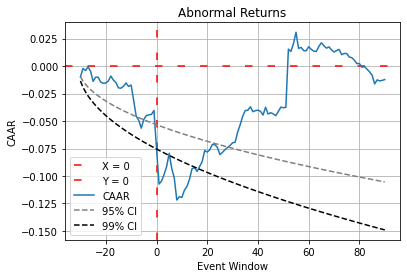

In [161]:

plt.axvline(x=0, color='r', linestyle=(0,(5,10)), label='X = 0')
plt.axhline(y=0, color='r', linestyle=(0,(5,10)), label='Y = 0')
# plt.scatter(aar.index.values,aar['AAR'],s=30,label='AAR')
# plt.plot(aar.index.values,aar['AAR'],linestyle='solid',linewidth=3)
# plt.scatter(aar.index.values,caar['CAAR'],s=30,label='CAAR')
plt.plot(caar.index.values,caar['CAAR'],linewidth=1.5, label='CAAR')
plt.plot(caar.index.values,caar['95% CI'],linewidth=1.5, linestyle='dashed', color='grey', label='95% CI')
plt.plot(caar.index.values,caar['99% CI'],linewidth=1.5, linestyle='dashed', color='black', label='99% CI')
plt.legend(fancybox=True)
plt.xlabel("Event Window")
plt.ylabel("CAAR")
plt.title('Abnormal Returns')
plt.grid()
plt.show()